In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
from tqdm import tqdm

In [2]:
import mdtraj as md
import nglview as nv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


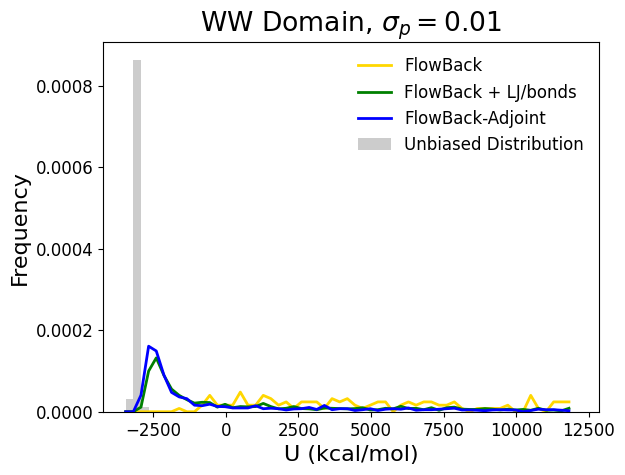

GTT | FlowBack             | Noise = 0.01     | KL = 0.0185
GTT | FlowBack + LJ/bonds    | Noise = 0.01    | KL = 0.0183
GTT | FlowBack-Adjoint   | Noise = 0.01      | KL = 0.0183
------------------------------------------------------------


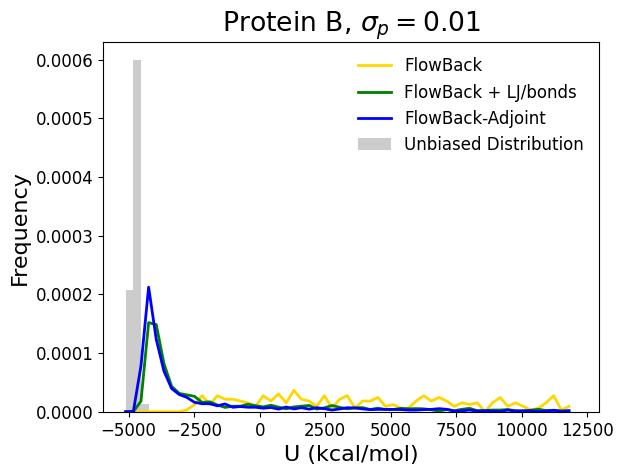

PRB | FlowBack             | Noise = 0.01     | KL = 0.0163
PRB | FlowBack + LJ/bonds    | Noise = 0.01    | KL = 0.0161
PRB | FlowBack-Adjoint   | Noise = 0.01      | KL = 0.0083
------------------------------------------------------------


In [10]:
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from rdkit import rdBase
# import warnings
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
from tqdm import tqdm

name_dict = {
    'GTT': 'WW Domain',
    'PRB': 'Protein B',
}

bins_ww        = np.linspace(-15000,  50000, 60)
bins_prb       = np.linspace(-22000, 50000, 60) 


eps = 1e-12          # small number to avoid log(0)
for noise,  ml in zip([0.01], ['n2510']):

# for noise,  ml in zip([0.003, 0.005, 0.01], ['n2503', 'n2505','n2510']):
    for protein, np_bins in zip(['GTT', 'PRB'], [bins_ww, bins_prb]):
    
        energies               = np.load(f"energy_files/energies_{protein}_nomodel.npy")
        flowback_energies      = np.load(f"energy_files/energies_{protein}_big_model_ckp-15_noise-{noise}_chi_0.25.npy")
        flowback_euler_energies= np.load(f"energy_files/energies_{protein}_big_model_ckp-15_euler_noise-{noise}_chi_0.2.npy")
    
        # build unbiased histogram first so we can reuse it
        hist_unbiased, bins = np.histogram(energies, np_bins, density=True)
    
        # --- FlowBack (Euler) ---
        hist_fb, _ = np.histogram(flowback_euler_energies, np_bins, density=True)
        plt.plot(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_fb,
                 c='gold', label='FlowBack', lw=2)
    
        # --- FlowBack + LJ/bonds ---
        hist_fb_lj, _ = np.histogram(flowback_energies, np_bins, density=True)
        plt.plot(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_fb_lj,
                 c='green', label='FlowBack + LJ/bonds', lw=2)
    
        # optional FlowBack-Adjoint
        hist_adj = None
        flowback_adj_energies = np.load(f"energy_files/energies_{protein}_{ml}_post_ckp-7000_noise-{noise}_chi_0.25.npy")
        hist_adj, _ = np.histogram(flowback_adj_energies, np_bins, density=True)
        # print(np.mean(flowback_adj_energies), np.percentile(flowback_adj_energies, 25),  np.median(flowback_adj_energies), np.percentile(flowback_adj_energies, 75))
        plt.plot(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_adj,
                 c='blue', label=f'FlowBack-Adjoint', lw=2)
        # unbiased bars
        bar_width = np.diff(bins)[0]
        plt.bar(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_unbiased,
                color='black', width=bar_width / 4.184, align='edge',
                alpha=0.2, label='Unbiased Distribution')
    
        plt.xlabel('U (kcal/mol)')
        plt.ylabel('Frequency')
        plt.title(f'{name_dict.get(protein, protein)}, $\sigma_p = ${noise}')
        plt.legend(fontsize=12, frameon=False)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
    
        # ---------- KL-divergence prints ----------
        kl_fb      = np.sum(hist_unbiased * np.log((hist_unbiased+eps)/(hist_fb     +eps)))
        kl_fb_lj   = np.sum(hist_unbiased * np.log((hist_unbiased+eps)/(hist_fb_lj +eps)))
        print(f"{protein} | FlowBack             | Noise = {noise}     | KL = {kl_fb:.4f}")
        print(f"{protein} | FlowBack + LJ/bonds    | Noise = {noise}    | KL = {kl_fb_lj:.4f}")
        if hist_adj is not None:
            kl_adj = np.sum(hist_unbiased * np.log((hist_unbiased+eps)/(hist_adj+eps)))
            print(f"{protein} | FlowBack-Adjoint   | Noise = {noise}      | KL = {kl_adj:.4f}")
        print('-'*60)

    plt.show()

GntR Transcriptional Regulator  K0JNC6
HTH-type Repressor NanR P0A8W0
DUF1778 Domain  J7QA90
CD9 antigen  P21926
SPI-1 system pilotin  P0CL43
AscX Q699R5
Mannose permease IID P69805
Antitoxin HigA P67701
UniProt-A0A377JKY9  A0A377JKY9
Nucleolar RNA helicase 2 Q9NR30
Transmembrane protein 173 E1C7U0
UniProt-A0A0H3AFX3  A0A0H3AFX3
[ 1.79828242e+04 -1.75618346e+04  2.61416431e+09  5.92552784e+03
  6.17088308e+07  3.87714251e+05  2.15415772e+05  1.15878260e+05
 -1.87549220e+04 -2.67307297e+04  8.75100478e+05  9.96130021e+09
  2.57593461e+06 -3.06656925e+04 -2.67782750e+04  1.18583099e+07
  4.73639677e+04  2.75699746e+07  5.15561624e+06  5.46521360e+07
 -2.01093411e+04  1.46160939e+09 -2.77753977e+04 -9.96050506e+02
  9.01979464e+07  7.88296135e+09  2.12765009e+05  8.26898106e+08
 -2.90080874e+04  1.85599092e+05  1.98885617e+07  9.69808593e+06
 -2.19659657e+04  6.17981107e+05  3.81911621e+06  7.83712413e+05
  1.38674918e+11  8.64529518e+04  1.74822345e+06  5.88123221e+04
 -9.58459460e+03 -2

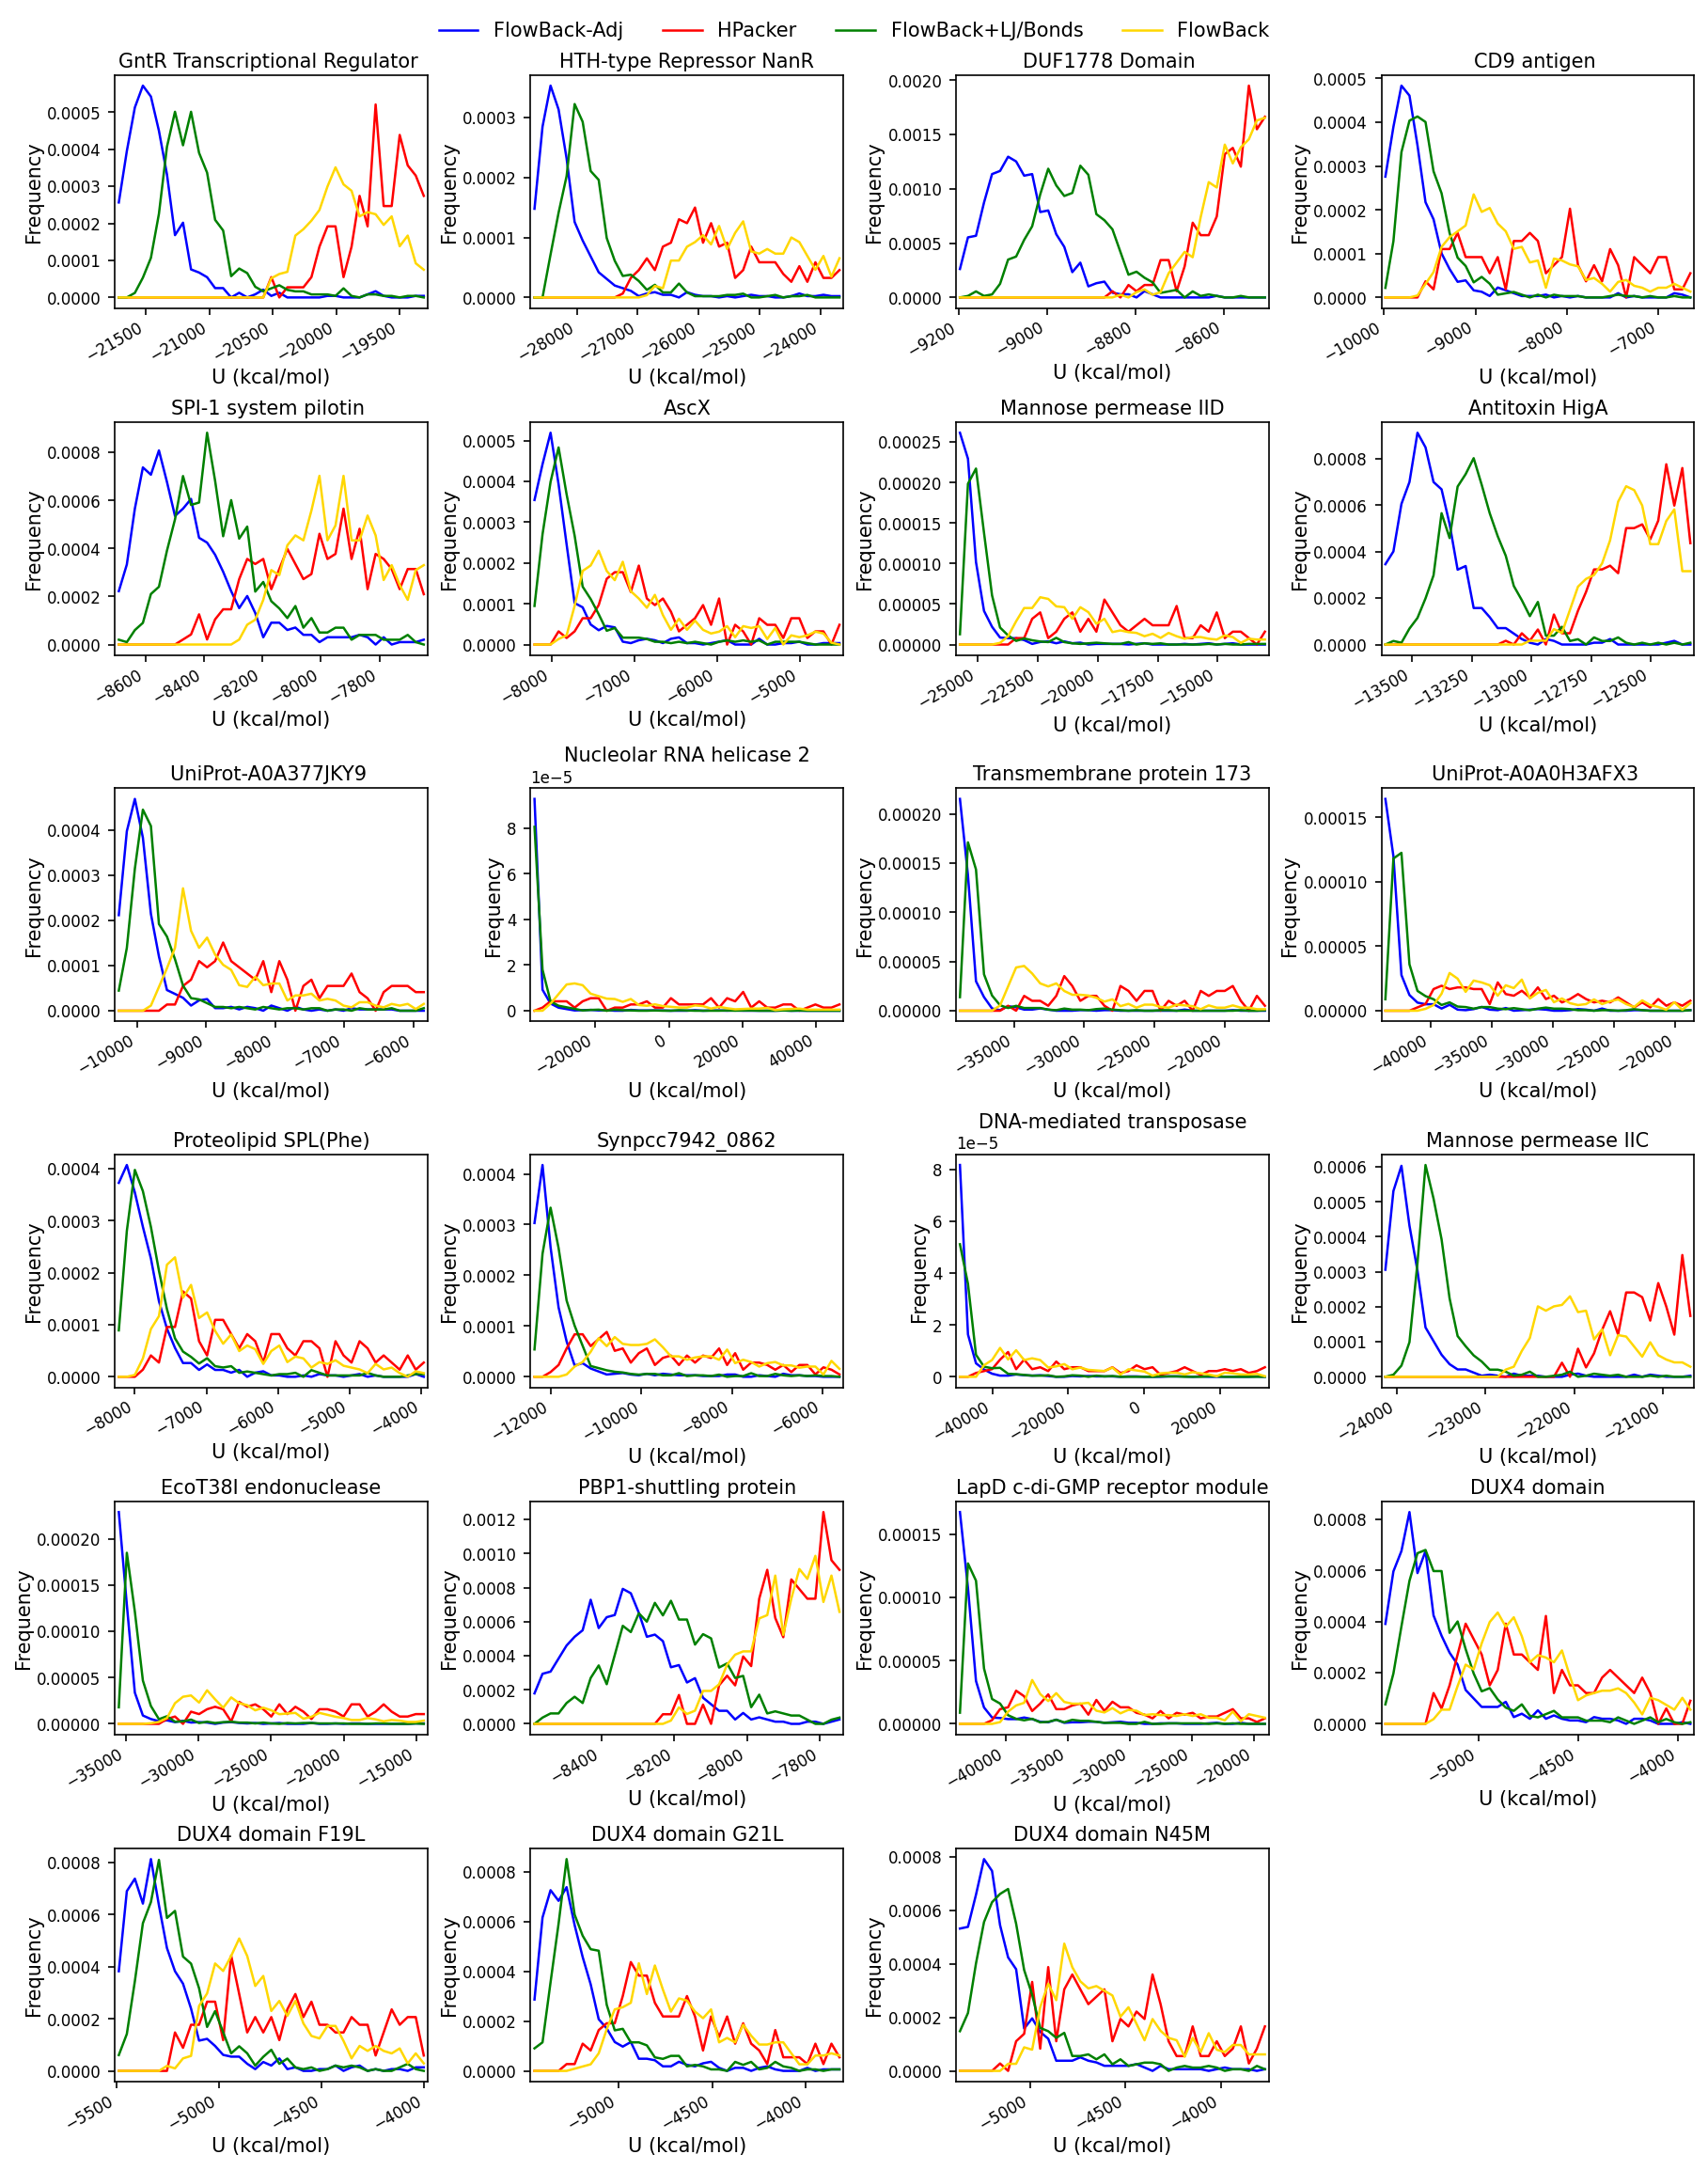

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm
from matplotlib.ticker import FuncFormatter
from bioemu_benchmarks.benchmarks import Benchmark
import pandas as pd
# load the file you downloaded, e.g. “uniprot_mapping.tsv”
df = pd.read_csv('uniprot.tsv', sep='\t', usecols=['From', 'Protein names'])
# rename columns to match our needs
df.columns = ['accession', 'protein_name']

# build your dict
protein_name_map = dict(zip(df['accession'], df['protein_name']))

# global styling
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8

noise_suffix = "_noise-0.003"

# define nice colors from the tab10 palette
# cmap = plt.get_cmap("tab10")
colors = {
    'FlowBack-Adj': 'blue',
    'HPacker':      'red',
    'FlowBack+LJ/Bonds':  'green',
    'FlowBack':     'gold',
}

# read protein list
with open('test_proteins.txt') as fh:
    proteins = [line.strip() for line in fh if line.strip()]

n = len(proteins)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols,
                         figsize=(cols*3, rows*2.5),
                         dpi=150,
                         constrained_layout=True)
axes = axes.flatten()

for ax, prot in zip(axes, proteins):
    # load data
    try:
        hpack  = np.load(f"energy_files/energies_hpack_{prot}_nomodel.npy")
        fb_adj = np.load(f"energy_files/energies_{prot}_lr5_post_ckp-2000{noise_suffix}.npy")
    except FileNotFoundError:
        ax.set_visible(False)
        continue

    # optional
    try:
        fb_lj = np.load(f"energy_files/energies_{prot}_big_model_ckp-15{noise_suffix}.npy")
    except FileNotFoundError:
        fb_lj = None
    try:
        fb = np.load(f"energy_files/energies_{prot}_big_model_ckp-15_euler{noise_suffix}.npy")
    except FileNotFoundError:
        fb = None

    # percentile clipping: 1st–50th
    all_data = np.concatenate(
        [hpack, fb_adj] +
        ([fb_lj] if fb_lj is not None else []) +
        ([fb]    if fb    is not None else [])
    )
 
        
    p_low, p_high = np.percentile(all_data, [1, 70])
    bins = np.linspace(p_low, p_high, 40)

    # helper to plot each distribution
    def plot_dist(data, label):
        hist, edges = np.histogram(data, bins, density=True)
        ax.plot((edges[:-1]+edges[1:])/(2 * 4.184), hist,
                lw=1.2, color=colors[label], label=label)

    plot_dist(fb_adj, 'FlowBack-Adj')
    plot_dist(hpack,  'HPacker')
    if fb_lj is not None: plot_dist(fb_lj, 'FlowBack+LJ/Bonds')
    if fb    is not None: plot_dist(fb,    'FlowBack')

    # tick tweaks
    ax.tick_params(axis='x', rotation=30,  pad=2)
    for lbl in ax.get_xticklabels():
        lbl.set_ha('right')
    ax.set_xlim(p_low / 4.184, p_high / 4.184)
    try:
        ax.set_title(protein_name_map[prot], fontsize=10, pad=4)
        print(protein_name_map[prot], prot)
    except:
        ax.set_title(prot, fontsize=10, pad=4)
        print(prot)
    ax.set_xlabel('U (kcal/mol)', fontsize=10, labelpad=2)
    ax.set_ylabel('Frequency',      fontsize=10, labelpad=2)

# hide any extra axes
for ax in axes[n:]:
    ax.set_visible(False)

# single legend at top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='upper center',
           ncol=len(labels),
           frameon=False,
           fontsize=10,
           bbox_to_anchor=(0.5, 1.02))

plt.show()


In [8]:
%load_ext autoreload
%autoreload 2
import sys
import mdtraj as md
sys.path.append('scripts/utils')
from chi_utils import get_all_chiralities_vec
# from utils import sample_rmsd_percent, clash_res_percent
from tqdm import tqdm
running_sum = 0
for i in tqdm(range(2230)):
    # print(i)
    # traj = md.load(f'outputs/PRB/n2503_post_ckp-7000_noise-0.003_chi_0.25/frame_{i}_1.pdb')[-1]
    traj = md.load(f'outputs/GTT/big_model_ckp-15_euler_noise-0.003_chi_0.2/frame_{i}_1.pdb')[-1]

    chis = get_all_chiralities_vec(traj[0])
    # print(chis)
        # print(chis, np.sum(chis == 1))
        # traj2 = md.load(f'outputs/PRB/big_model_ckp-15_euler_noise-0.003/traj.xtc', top=f'data/PRB_clean_AA/frame_0.pdb')
        # chis = get_all_chiralities_vec(traj2[i])
        # print(chis, np.sum(chis == 1))
        # traj3 = md.load(f'data/PRB_clean_AA/frame_{i}.pdb')
        # chis = get_all_chiralities_vec(traj3[0])
    running_sum += (np.sum(chis == 1) > 0)
    # clash = clash_res_percent(traj[0])
    # if clash != 0.0:
    #     print('clash', i, clash)
print(running_sum)
# traj = md.load(f'outputs/PRB/lr5_post_ckp-2000_noise-0.003/traj.xtc', top=f'data/PRB_clean_AA/frame_0.pdb')
# chis = get_all_chiralities_vec(traj[i])
# np.where(chis == 0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|███████████████████████████████████████| 2230/2230 [00:45<00:00, 49.53it/s]

1


In [4]:
traj.top.n_residues

35

In [9]:
'outputs/GTT/r03_post_ckp-3800_noise-0.003_chi/

47

In [ ]:
from tqdm import tqdm
import mdtraj as md
import os
os.makedirs(f'data/clusters/all_aa', exist_ok=True)
for i in tqdm(range(1)):
    traj = md.load(f'data/clusters/{i}/chignolin_{i}.xtc', top=topology_file)
    # ca_traj = traj.atom_slice(traj.top.select('name CA'))
    traj[0].save_pdb(f'data/clusters/all_aa/{i}_rep.pdb')

In [33]:
%load_ext autoreload 
%autoreload 2
protein = 'GTT'
top_file = f'outputs/{protein}/fl25_post_ckp-8000_noise-0.003_chi_0.25/frame_0_1.pdb'
traj_am = md.load(f'outputs/{protein}/n2503_post_ckp-7000_noise-0.003_chi_0.25/traj.xtc', top=top_file)
traj_lj = md.load(f'outputs/{protein}/big_model_ckp-15_noise-0.003_chi_0.25/traj.xtc', top=top_file)
traj_fb = md.load(f'outputs/{protein}/big_model_ckp-15_euler_noise-0.003_chi_0.2/traj.xtc', top=top_file)
traj_gt = md.load(f'data/{protein}_clean_AA/traj.xtc', top=top_file)
traj_010 = md.load(f'outputs/{protein}/n2510_post_ckp-7000_noise-0.01_chi_0.25/traj.xtc', top=top_file)
traj_005 = md.load(f'outputs/{protein}/n2505_post_ckp-7000_noise-0.005_chi_0.25/traj.xtc', top=top_file)
traj_010_fb = md.load(f'outputs/{protein}/big_model_ckp-15_euler_noise-0.01_chi_0.2/traj.xtc', top=top_file)
traj_005_fb = md.load(f'outputs/{protein}/big_model_ckp-15_euler_noise-0.005_chi_0.2/traj.xtc', top=top_file)
traj_010_lj = md.load(f'outputs/{protein}/big_model_ckp-15_noise-0.005_chi_0.25/traj.xtc', top=top_file)
traj_005_lj = md.load(f'outputs/{protein}/big_model_ckp-15_noise-0.01_chi_0.25/traj.xtc', top=top_file)
amino_acid_codes = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'] #GLY has no chi1


colors = ["gold", 'blue', 'red', "green", "cyan", "gray"]  # Previous colors
labels = ["FlowBack", "FlowBack-Adj-0.01","FlowBack-Adj-0.005", "FlowBack-0.01","FlowBack-0.005", "FlowBack-LJ-0.01","FlowBack-LJ-0.005", "FlowBack + LJ/Bonds", "FlowBack-Adjoint", "Unbiased"]
trajs = [traj_fb, traj_010, traj_005, traj_010_fb, traj_005_fb, traj_010_lj, traj_005_lj, traj_lj, traj_am, traj_gt]
unbiased_hists = []
bins = np.linspace(-np.pi, np.pi, 50)
for aa in amino_acid_codes:
    selection = f'resname {aa}'
    atoms = trajs[-1].top.select(selection)
    if len(atoms):
        chi = md.compute_chi1(trajs[-1].atom_slice(atoms))[1].flatten()
        hist_unbiased, _ = np.histogram(chi, bins=bins, density=True)
        unbiased_hists.append(hist_unbiased)
    else:
        unbiased_hists.append(np.zeros_like(bins))

# print(unbiased_hists)

bins = np.linspace(-np.pi, np.pi, 40)
for t,  label in zip(trajs[:-1], labels[:-1]):
    kls = []
    for i, aa in enumerate(amino_acid_codes):
        selection = f'resname {aa}'
        atoms = t.top.select(selection)
        # print(atoms)
        if len(atoms):
            chi = md.compute_chi1(t.atom_slice(atoms))[1].flatten()
            hist, _ = np.histogram(chi, bins=np.linspace(-np.pi, np.pi, 50), density=True)
            kl = np.sum(unbiased_hists[i] * np.log((unbiased_hists[i]+eps)/(hist+eps)))
            kls.append(kl)
    print(f"{protein} | {label}                 | KL = {np.mean(kls):.4f}")
# plt.legend(fontsize=12)
# plt.ylim(0, 2.2)
# plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GTT | FlowBack                 | KL = 9.4571
GTT | FlowBack-Adj-0.01                 | KL = 4.0655
GTT | FlowBack-Adj-0.005                 | KL = 5.5591
GTT | FlowBack-0.01                 | KL = 4.2743
GTT | FlowBack-0.005                 | KL = 4.4428
GTT | FlowBack-LJ-0.01                 | KL = 4.6214
GTT | FlowBack-LJ-0.005                 | KL = 4.2067
GTT | FlowBack + LJ/Bonds                 | KL = 13.9561
GTT | FlowBack-Adjoint                 | KL = 11.9573


In [32]:
%load_ext autoreload 
%autoreload 2
protein = 'PRB'
top_file = f'outputs/{protein}/fl25_post_ckp-8000_noise-0.003_chi_0.25/frame_0_1.pdb'
traj_am = md.load(f'outputs/{protein}/n2503_post_ckp-7000_noise-0.003_chi_0.25/traj.xtc', top=top_file)
traj_lj = md.load(f'outputs/{protein}/big_model_ckp-15_noise-0.003_chi_0.25/traj.xtc', top=top_file)
traj_fb = md.load(f'outputs/{protein}/big_model_ckp-15_euler_noise-0.003_chi_0.2/traj.xtc', top=top_file)
traj_gt = md.load(f'data/{protein}_clean_AA/traj.xtc', top=top_file)
traj_010 = md.load(f'outputs/{protein}/n2510_post_ckp-7000_noise-0.01_chi_0.25/traj.xtc', top=top_file)
traj_005 = md.load(f'outputs/{protein}/n2505_post_ckp-7000_noise-0.005_chi_0.25/traj.xtc', top=top_file)
traj_010_fb = md.load(f'outputs/{protein}/big_model_ckp-15_euler_noise-0.01_chi_0.2/traj.xtc', top=top_file)
traj_005_fb = md.load(f'outputs/{protein}/big_model_ckp-15_euler_noise-0.005_chi_0.2/traj.xtc', top=top_file)
traj_010_lj = md.load(f'outputs/{protein}/big_model_ckp-15_noise-0.005_chi_0.25/traj.xtc', top=top_file)
traj_005_lj = md.load(f'outputs/{protein}/big_model_ckp-15_noise-0.01_chi_0.25/traj.xtc', top=top_file)
amino_acid_codes = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'] #GLY has no chi1


colors = ["gold", 'blue', 'red', "green", "cyan", "gray"]  # Previous colors
labels = ["FlowBack", "FlowBack-Adj-0.01","FlowBack-Adj-0.005", "FlowBack-0.01","FlowBack-0.005", "FlowBack-LJ-0.01","FlowBack-LJ-0.005", "FlowBack + LJ/Bonds", "FlowBack-Adjoint", "Unbiased"]
trajs = [traj_fb, traj_010, traj_005, traj_010_fb, traj_005_fb, traj_010_lj, traj_005_lj, traj_lj, traj_am, traj_gt]
unbiased_hists = []
bins = np.linspace(-np.pi, np.pi, 50)
for aa in amino_acid_codes:
    selection = f'resname {aa}'
    atoms = trajs[-1].top.select(selection)
    if len(atoms):
        chi = md.compute_chi1(trajs[-1].atom_slice(atoms))[1].flatten()
        hist_unbiased, _ = np.histogram(chi, bins=bins, density=True)
        unbiased_hists.append(hist_unbiased)
    else:
        unbiased_hists.append(np.zeros_like(bins))

# print(unbiased_hists)

bins = np.linspace(-np.pi, np.pi, 40)
for t,  label in zip(trajs[:-1], labels[:-1]):
    kls = []
    for i, aa in enumerate(amino_acid_codes):
        selection = f'resname {aa}'
        atoms = t.top.select(selection)
        # print(atoms)
        if len(atoms):
            chi = md.compute_chi1(t.atom_slice(atoms))[1].flatten()
            hist, _ = np.histogram(chi, bins=np.linspace(-np.pi, np.pi, 50), density=True)
            # print(i, hist, unbiased_hists[i])
        # plt.hist(chi,
        #         bins=bins,
        #         density=True,                    # PDF rather than raw counts
        #         histtype="step",
        #         alpha=1,
        #         color=color,
        #         label=label,
        #         linewidth=2)
            kl = np.sum(unbiased_hists[i] * np.log((unbiased_hists[i]+eps)/(hist+eps)))
            # if np.isnan(kl):
            #     print(chi)
            #     
            # print(aa, kl)
            kls.append(kl)
    print(f"{protein} | {label}                 | KL = {np.mean(kls):.4f}")
# plt.legend(fontsize=12)
# plt.ylim(0, 2.2)
# plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
PRB | FlowBack                 | KL = 6.7555
PRB | FlowBack-Adj-0.01                 | KL = 3.5108
PRB | FlowBack-Adj-0.005                 | KL = 3.6379
PRB | FlowBack-0.01                 | KL = 3.9043
PRB | FlowBack-0.005                 | KL = 3.4624
PRB | FlowBack-LJ-0.01                 | KL = 3.6003
PRB | FlowBack-LJ-0.005                 | KL = 3.4754
PRB | FlowBack + LJ/Bonds                 | KL = 7.7228
PRB | FlowBack-Adjoint                 | KL = 8.1331


In [20]:
ATOM_HIERARCHY = {
    0: ['C', 'N', 'CA', 'O'],
    1: ['CB'],
    2: ['CG', 'OG', 'SG', 'OG1', 'CG1', 'CG2'],
    3: ['CD', 'CD1', 'CD2', 'ND1', 'ND2', 'OD1', 'OD2', 'SD'],
    4: ['CE', 'CE1', 'CE2', 'CE3', 'NE', 'NE1', 'NE2', 'OE1', 'OE2'],
    5: ['CZ', 'CZ2', 'CZ3', 'NZ'],
    6: ['CH2', 'NH1', 'NH2', 'OH']
}
rmsd_plot = np.zeros((len(trajs) - 1, 7))
cur_accepted_atoms = []
for level in range(7):
    cur_accepted_atoms.extend(ATOM_HIERARCHY[level])
    selection = 'name ' + ' or name '.join(cur_accepted_atoms)
    for k, traj in enumerate(trajs[:-1]):
        part_i = traj.atom_slice(traj.top.select(selection))
        part_j = trajs[-1].atom_slice(trajs[-1].top.select(selection))
        rmsd_plot[k, level] = np.mean([
            md.rmsd(part_i[i], part_j[i])[0] for i in range(part_i.n_frames) 
        ])

In [66]:
import mdtraj as md
import nglview as nv
tt = md.load('outputs/GTT/fl25_post_ckp-8000_noise-0.003_chi_0.25/frame_11_1.pdb')
view = nv.show_mdtraj(tt)
view.clear()
view.add_ball_and_stick()
a = view.add_trajectory(md.load('data/GTT_clean_AA/frame_11.pdb'))
a.clear_representations()
a.add_representation('ball+stick', color='green', opacity=0.5)
view

NGLWidget()

In [10]:
from utils import sample_rmsd_percent, clash_res_percent
protein = 'GTT'
n_proteins = 2230
models = ['tov_post_ckp-15_noise-0.003']
diversities = np.zeros((3, n_proteins // 100 + 1))

for m, model in enumerate(models):
    clash = []
    for f in range(0, n_proteins, 100):
        trj_ref_div = md.load(f'../data/{protein}_clean_AA/frame_{f}.pdb')
        test_frames = [f'../outputs/{protein}_test/{model}/frame_{f}_{k}.pdb' for k in range(1, 11)]
        trj_gens_div = md.load(test_frames[0])
        for k in range(1, 10):
            trj_gens_div = trj_gens_div.join(md.load(test_frames[k]))
        
        clash.append(np.mean([clash_res_percent(trj_gens_div[i]) for i in range(len(trj_gens_div))]))
        div, _ = sample_rmsd_percent(trj_ref_div, trj_gens_div)
        diversities[m, f//100] = div
    print(f'Mean Clash: {np.mean(clash)}')

np.mean(diversities, axis=1)


KeyboardInterrupt



In [155]:
view = nv.show_mdtraj(trajs[-1])
view.add_trajectory(trajs[0])
view

NGLWidget(max_frame=2229)

Q2FYI5


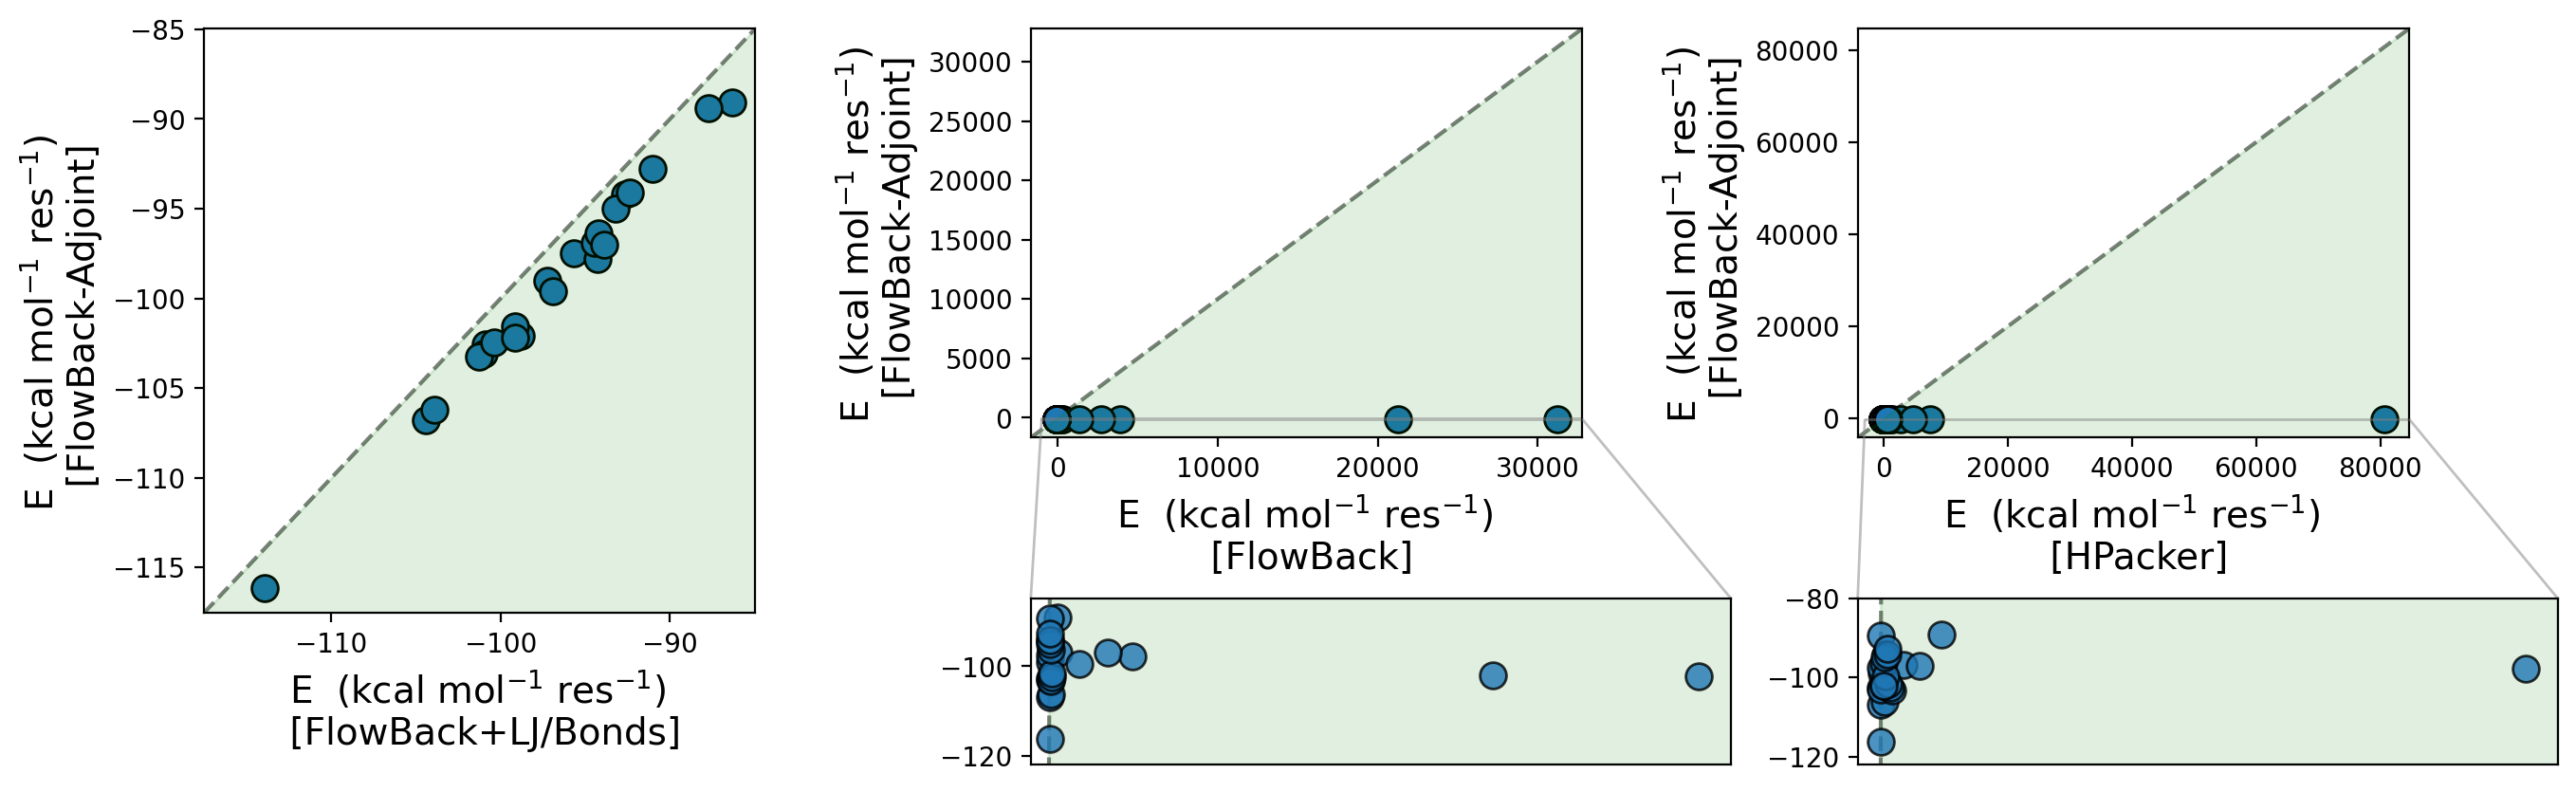

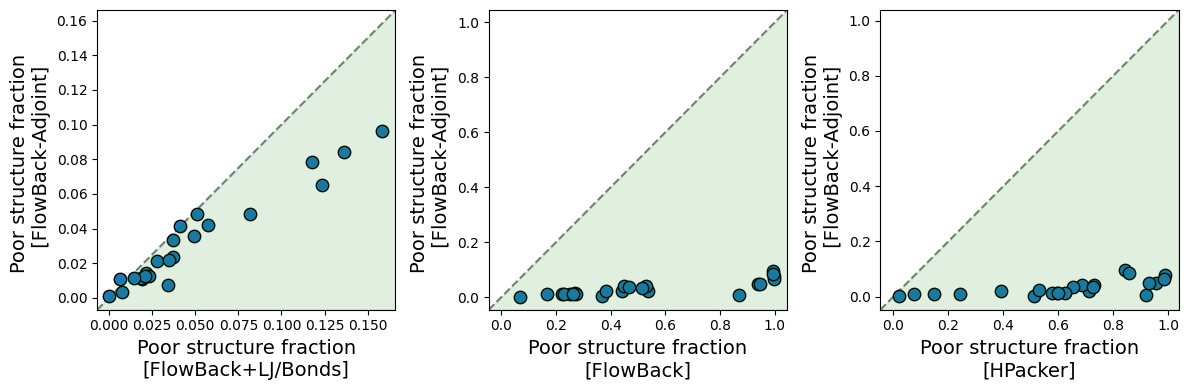

In [4]:
%load_ext autoreload
%autoreload 2
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
with open('test_proteins.txt', 'r') as f:
    lines = f.readlines()

import os
import glob
models = ['n2503_post_ckp-7000_noise-0.003_chi_0.25',
           'big_model_ckp-15_noise-0.003_chi_0.25',
           'big_model_ckp-15_euler_noise-0.003_chi_0.2']
e_lists = [[], [], [], []]
bad_lists = [[], [], [], []]
nres_list = []
kcal_mol_residue = []
for line in lines:
    lenergies = []
    protein = line.strip()
    for i, model in enumerate(models):
        
        energies = np.load(f'energy_files/energies_{protein}_{model}.npy') 
        n_residues = md.load(f'data/{protein}/frame_00001.pdb').n_residues
        # print(n_residues)
        e_lists[i].append(np.nanmedian(energies))
        if i == 1 and np.nanmedian(energies) / (n_residues * 4.184) < -110:
            print(protein)
        bad_lists[i].append(len(energies[energies > e_lists[0][-1] + (10000 * 4.184)]) / len(energies)) 
        lenergies.append(len(energies))
        # print(protein, model, e_lists[i][-1], bad_lists[i][-1], len(energies))
        if i == 0:
            nres_list.append(n_residues)
    if lenergies[0] == lenergies[1] and lenergies[1] == lenergies[2]:
        kcal_mol_residue.append((e_lists[0][-1] - e_lists[2][-1]) / (n_residues * 4.184))

    energies = np.load(f'energy_files/energies_hpack_{protein}_nomodel.npy')
    e_lists[3].append(np.nanmedian(energies))
    # print(np.nanmedian(energies), e_lists[0][-1])
    if len(energies):
        bad_lists[3].append(len(energies[energies > e_lists[0][-1] + (10000 * 4.184)]) / len(energies))
    else:
        bad_lists[3].append(np.nan)

# fig, axes = plt.subplots(1, 3, figsize=(13, 4), dpi=200)
fig = plt.figure(figsize=(15, 4), dpi=200)
gs  = fig.add_gridspec(1, 3,
                       width_ratios=[1, 1, 1],
                       wspace=0.5)

axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

hpack = np.array(e_lists[3]) / (np.array(nres_list) * 4.184)  
flowback_lj  = np.array(e_lists[1]) / (np.array(nres_list) * 4.184)   # kcal mol-1 res-1
flowback     = np.array(e_lists[2]) / (np.array(nres_list) * 4.184)
flowback_adj = np.array(e_lists[0]) / (np.array(nres_list) * 4.184)

###############################################################################
# 2.  First row – pair-wise scatter plots
###############################################################################
pair_sets = [
    (flowback_lj, flowback_adj, r"FlowBack+LJ/Bonds"),
    (flowback, flowback_adj, r"FlowBack"),
    
    (hpack, flowback_adj, "HPacker")
]

for ax, (x, y, title) in zip(axes, pair_sets):
    ax.scatter(x, y, edgecolor='black', s=100)
    # ax.set_title(title, fontsize=18)
    diff = np.nanmax(x) - np.nanmin(x)
    extra = 0.05 * diff
    lims = [np.nanmin(y) - extra, np.nanmax(x) +  extra]
    ax.plot(lims,  lims,
            ls='--', color='gray', zorder=0)           # y = x
    
    
    
    ax.set_xlabel("E  (kcal mol$^{-1}$ res$^{-1}$) \n" + f" [{title}]", fontsize=14)
    ax.set_ylabel("E  (kcal mol$^{-1}$ res$^{-1}$) \n [FlowBack-Adjoint]", fontsize=14)
    ax.set_xlim(lims)

    # if title == "HPacker":
    #     ax.set_yticks([5000])
        

    # fraction of points with y < x (energetically better)
    frac_better = np.nanmean(y < x) * 100
    # ax.text(0.05, 0.95, f"{frac_better:.1f}% better",
    #         transform=ax.transAxes, fontsize=10,
    #         va='top', ha='left',
    #         bbox=dict(boxstyle='round,pad=0.3',
    #                   facecolor='white', edgecolor='gray', alpha=0.8))
    # ax.set_xscale('symlog', linthresh=10)
    # ax.set_yscale('symlog', linthresh=10)
    ax.set_ylim(lims)
    ax.fill_between(lims,  ax.get_ylim()[0], lims, color='green', alpha=0.12)

x = flowback
y = flowback_adj
# Now—the “below” inset for HPacker (third subplot)
# grab the HPacker Axes
hp_ax = axes[1]

# get its current position in figure coords
pos = hp_ax.get_position()

# choose a shrink factor (e.g. 0.7)
shrink = 0.7

# compute the new height and re-center vertically
new_h = pos.height * shrink
new_y0 = pos.y0 + (pos.height - new_h) 

# apply the new position: [x0, y0, width, height]
hp_ax.set_position([pos.x0, new_y0, pos.width, new_h])
# define inset height as, e.g., 20% of the main axis height
inset_h = pos.height * 0.35  
# make a small vertical gap of 0.02
gap = 0.2

# [x0, y0, width, height] of the new inset (all in figure coords)
inset_rect = [
    pos.x0,                 # same left
    pos.y0  - gap, # drop below by height + gap
    pos.width * (1 + inset_h),              # same width
    inset_h - 0.05          # our chosen height
]
axinss = fig.add_axes(inset_rect)
lim_lo = min(np.nanmin(x), np.nanmin(y)) 
lim_hi = max(np.nanmax(x), np.nanmax(y)) 


axinss.plot(lims,  lims,
    ls='--', color='gray', zorder=0)  
axinss.fill_between(lims,  ax.get_ylim()[0], lims, color='green', alpha=0.12)
# 3) scatter only the core points
axinss.scatter(x,
              y,
              edgecolor='black',
              s=100,
              alpha=0.8)
axinss.set_xlim(-1000, lim_hi * 1.05)
axinss.set_ylim(lim_lo * 1.05, np.max(y) / 1.05)
# drop ticks & frame if you like
axinss.set_xticks([])
# axins.set_yticks([])
# axins.set_title("<33 %-ile", fontsize=14)

# 4) draw a rectangle/connector on the main axes
mark_inset(hp_ax, axinss,
           loc1=2, loc2=1,
           fc="none", ec="0.5", lw=1, alpha=0.5)


# Now—the “below” inset for HPacker (third subplot)
# grab the HPacker Axes
hp_ax = axes[2]
x = hpack
# get its current position in figure coords
pos = hp_ax.get_position()

# choose a shrink factor (e.g. 0.7)
shrink = 0.7

# compute the new height and re-center vertically
new_h = pos.height * shrink
new_y0 = pos.y0 + (pos.height - new_h) 
new_bbox = [pos.x0, new_y0, pos.width, new_h]

hp_ax.set_position(new_bbox)  
# apply the new position: [x0, y0, width, height]
# hp_ax.set_position([pos.x0, new_y0, pos.width, new_h])
# define inset height as, e.g., 20% of the main axis height
inset_h = pos.height * 0.35  
# make a small vertical gap of 0.02
gap = 0.2
# print(pos)

# [x0, y0, width, height] of the new inset (all in figure coords)
inset_rect = [
    pos.x0,                 # same left
    pos.y0  - gap, # drop below by height + gap
    pos.width * (1 + inset_h),              # same width
    inset_h - 0.05          # our chosen height
]
axins = fig.add_axes(inset_rect)
lim_lo = min(np.nanmin(x), np.nanmin(y)) 
lim_hi = max(np.nanmax(x), np.nanmax(y)) 
xx = x[~np.isnan(x)]
xthr = np.percentile(xx, 100)
ythr = np.percentile(y, 100)

axins.plot(lims,  lims,
    ls='--', color='gray', zorder=0)  
axins.fill_between(lims,  ax.get_ylim()[0], lims, color='green', alpha=0.12)

# 3) scatter only the core points
axins.scatter(x,
              flowback_adj,
              edgecolor='black',
              s=100,
              alpha=0.8)
axins.set_xlim(-3000, lim_hi * 1.05)
axins.set_ylim(lim_lo * 1.05, -80)
# drop ticks & frame if you like
axins.set_xticks([])

# print(np.median(flowback - flowback_adj))
# 4) draw a rectangle/connector on the main axes
mark_inset(axes[2], axins,
           loc1=2, loc2=1,
           fc="none", ec="0.5", lw=1, alpha=0.5)
# scatter only the “core” HPacker points (e.g. ≤90th percentile)
plt.show()
###############################################################################
# 3.  Second row – ΔE scatter plots (same x-axis as the first row)
###############################################################################
# delta_sets = [
#     ( flowback_adj - flowback, flowback_adj,         r"FlowBack", flowback),
#     ( flowback_adj  - flowback_lj, flowback_adj, r"FlowBack+LJ/Bonds", flowback_lj),
#     (flowback_adj - hpack, flowback_adj, "HPacker", hpack)
# ]

hpack_bad = np.array(bad_lists[3])
flowback_lj_bad  = np.array(bad_lists[1])
flowback_bad     = np.array(bad_lists[2])
flowback_adj_bad = np.array(bad_lists[0]) 

delta_sets = [
    ( flowback_lj_bad , flowback_adj_bad , r"FlowBack+LJ/Bonds", flowback_lj),
    ( flowback_bad , flowback_adj_bad,         r"FlowBack", flowback),
    (hpack_bad, flowback_adj_bad, "HPacker", hpack)
]


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, (x, y, title, lim) in zip(axes, delta_sets):
    # print(np.nanmax(x)) 
    
    ax.scatter(x[~np.isnan(x)], y[~np.isnan(x)], edgecolor='black', s=80)
    ax.set_ylabel("Poor structure fraction \n [FlowBack-Adjoint]", fontsize=14)
    diff = np.nanmax(x) - np.nanmin(x)
    extra = 0.05 * diff
    lims = [np.nanmin(y) - extra, np.nanmax(x) +  extra]
    ax.plot(lims,  lims,
            ls='--', color='gray', zorder=0)           # y = x
    # ax.set_title(title, fontsize=18)
    # print(np.nanmax(lim))
    # print(sum(x>=y))
    ax.set_ylim(lims)
    ax.set_xlim(lims)
    ax.fill_between(lims,  ax.get_ylim()[0], lims, color='green', alpha=0.12)
    # print(ax.get_xlim())

    ax.set_xlabel(r"Poor structure fraction" + f"\n[{title}]",
                          fontsize=14)

plt.tight_layout()
plt.show()


# pick a “pretty” colormap and draw them all on the same axes
# cmap = plt.get_cmap('Set2')  # tab10 has 10 nice distinct colors
# for i, (dx, y, label, _) in enumerate(delta_sets):
#     ax.axvline(np.nanmean(dx), linestyle='--', color=cmap(i))
#     ax.scatter(dx,
#                y,
#                label=label,
#                color=cmap(i),
#                edgecolor='black',
#                s=80,
#                alpha=1)
    
# # vertical “zero” line for reference
# ax.axvline(0, linestyle='--', color='gray')

# # if all your ΔE’s are strictly positive, you can do
# #    ax.set_xscale('log')
# # otherwise use a symmetric‐log so negatives don’t blow up
# ax.set_xscale('symlog', linthresh=1)
# ax.set_xlabel('$\Delta E$ (kcal.mol$^{-1}$.res$^{-1}$')
# ax.set_xlim(-20000, 2)
# # ax.set_xlabel(r"$\Delta E\;\bigl(\mathrm{kcal\,mol^{-1}\,res^{-1}}\bigr)$", fontsize=14)
# ax.set_ylabel("FlowBack-Adjoint Energy\n(kcal mol$^{-1}$ res$^{-1}$)", fontsize=14)

# ax.legend(title="FlowBack-Adjoint $\Delta E$ vs.", loc="upper right")
# # plt.tight_layout()
# plt.show()


dux4_f19l


/scratch/local/jobs/34646239/ipykernel_2984441/251696454.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


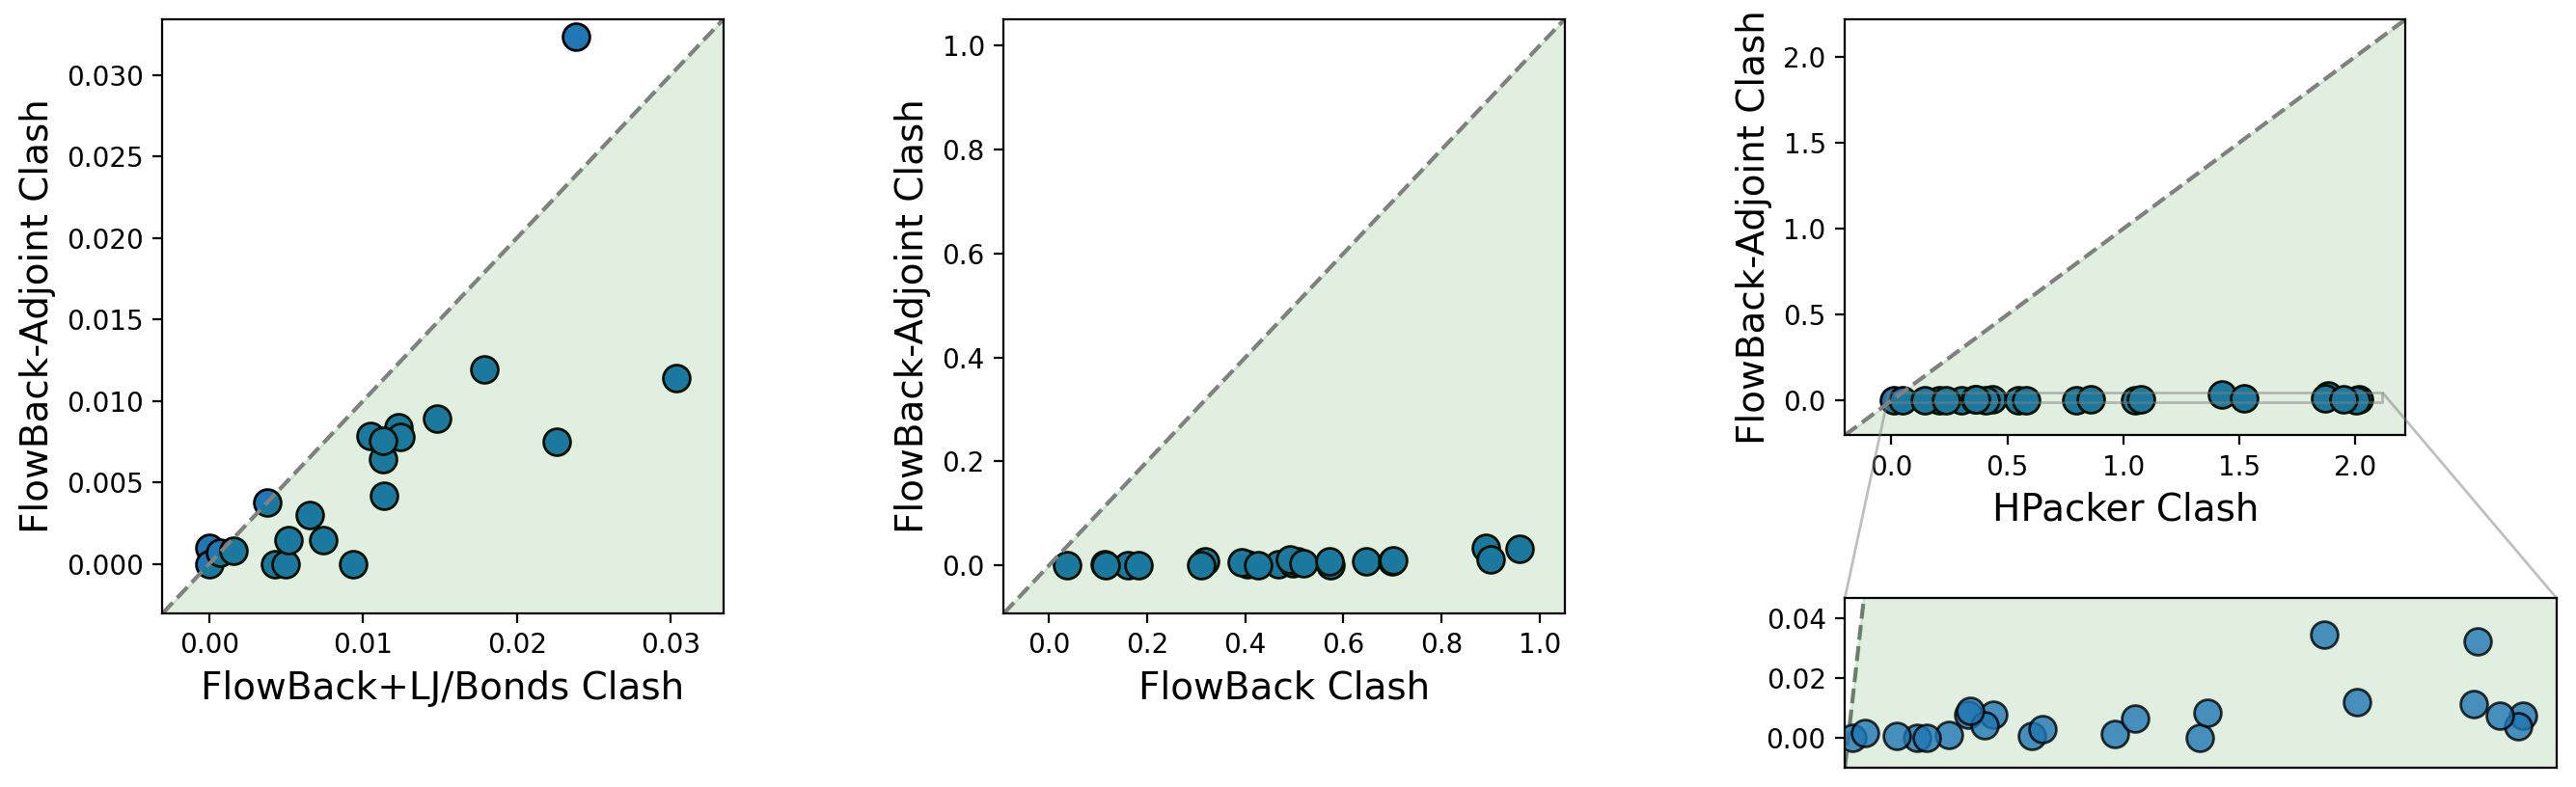

(array([ 0,  2,  5,  8, 10, 21]),)
0.011681539233110952


In [3]:
with open('test_proteins.txt', 'r') as f:
    lines = f.readlines()

from mpl_toolkits.axes_grid1.inset_locator import mark_inset

models = ['n2503_post_ckp-7000_noise-0.003_chi_0.25', 'big_model_ckp-15_noise-0.003_chi_0.25', 'big_model_ckp-15_euler_noise-0.003_chi_0.2']
# e_lists = [[], [], []]
clash_lists = [[], [], [], []]
natom_list = []
for line in lines:
    protein = line.strip()
    for i, model in enumerate(models):
        protein = line.strip()
        # bond_score = np.load(f'outputs/{protein}/{model}/bf.npy')
        clash_score = np.load(f'outputs/{protein}/{model}/cls.npy')
        if i == 1 and np.mean(clash_score) > 0.03:
            print(protein)
        clash_lists[i].append(np.mean(clash_score))
        # print(protein, model, np.mean(bond_score), np.mean(clash_score))
        

    # bond_score = np.load(f'outputs/{protein}/{model}/bf.npy')
    clash_score = np.load(f'data/hpack_{protein}/cls.npy')
    # print(protein, model, np.mean(bond_score), np.mean(clash_score))
    clash_lists[3].append(np.mean(clash_score))

fig = plt.figure(figsize=(15, 4), dpi=200)
gs  = fig.add_gridspec(1, 3,
                       width_ratios=[1, 1, 1],
                       wspace=0.5)

axes = [fig.add_subplot(gs[0, i]) for i in range(3)]
pair_sets = [
    (clash_lists[1], clash_lists[0], r"FlowBack+LJ/Bonds Clash"),
    (clash_lists[2], clash_lists[0], r"FlowBack Clash"),
    (clash_lists[3], clash_lists[0], "HPacker Clash")
]
# titles = ['FlowBack + LJ/Bonds', 'FlowBack']
for ax, (x, y, title) in zip(axes, pair_sets):
    # plt.figure(figsize=(4, 4), dpi=200)
    ax.scatter(x, y, edgecolor='black', s=100)
    diff = np.nanmax(x) - np.nanmin(x)
    extra = min(0.1*diff, 100)
    lims = [np.nanmin(y) - extra, np.nanmax(x) + extra]
    ax.plot(lims, lims, ls='--', c='gray')
    ax.set_xlim(lims)

    ax.set_ylim(lims)
    
    ax.fill_between(lims, ax.get_ylim()[0], lims, color='green', alpha=0.12)
    
    frac_better = (np.array(clash_lists[i]) > np.array(clash_lists[0])).mean() * 100
    frac_equal = (np.array(clash_lists[i]) == np.array(clash_lists[0])).mean() * 100
    # plt.gca().text(0.1, 0.8,  f"{frac_better:.1f}% better\n{frac_equal:.1f}% equal ", transform=plt.gca().transAxes,
    #         fontsize=10,
    #         va='top', ha='left',
    #         bbox=dict(boxstyle='round,pad=0.3',
    #                   facecolor='white', edgecolor='gray', alpha=0.8))
    # print(f"{titles[i-1]}: {frac_better:.1f}% better, {frac_equal:.1f}% equal. Average improvement: { np.nanmean((np.array(clash_lists[i]) - np.array(clash_lists[0])) / np.array(clash_lists[i])) }   ")
    # plt.suptitle('Clash Score Comparison', fontsize=14)
    ax.set_ylabel('FlowBack-Adjoint Clash', fontsize=14)
    ax.set_xlabel(title, fontsize=14)


# Now—the “below” inset for HPacker (third subplot)
# grab the HPacker Axes
hp_ax = axes[2]
# get its current position in figure coords
pos = hp_ax.get_position()

# choose a shrink factor (e.g. 0.7)
shrink = 0.7

# compute the new height and re-center vertically
new_h = pos.height * shrink
new_y0 = pos.y0 + (pos.height - new_h) 

# apply the new position: [x0, y0, width, height]
hp_ax.set_position([pos.x0, new_y0, pos.width, new_h])
# define inset height as, e.g., 20% of the main axis height
inset_h = pos.height * 0.35  
# make a small vertical gap of 0.02
gap = 0.2
# [x0, y0, width, height] of the new inset (all in figure coords)
inset_rect = [
    pos.x0,                 # same left
    pos.y0  - gap, # drop below by height + gap
    pos.width * (1 + inset_h),              # same width
    inset_h - 0.05          # our chosen height
]
axins = fig.add_axes(inset_rect)
# lim_lo = min(np.nanmin(x), np.nanmin(y)) 
# lim_hi = max(np.nanmax(x), np.nanmax(y)) 
# xx = x[~np.isnan(x)]
xthr = np.percentile(x, 100)
ythr = np.percentile(y, 100)

axins.plot(lims,  lims,
    ls='--', color='gray', zorder=0)  
axins.fill_between(lims,  ax.get_ylim()[0], lims, color='green', alpha=0.12)

# 3) scatter only the core points
axins.scatter(x,
              y,
              edgecolor='black',
              s=100,
              alpha=0.8)
axins.set_xlim(-0.01, xthr * 1.05)
axins.set_ylim(-0.01, ythr * 1.35)
# drop ticks & frame if you like
axins.set_xticks([])
# axins.set_yticks([])
# axins.set_title("<33 %-ile", fontsize=14)

# 4) draw a rectangle/connector on the main axes
mark_inset(hp_ax, axins,
           loc1=2, loc2=1,
           fc="none", ec="0.5", lw=1, alpha=0.5)
plt.tight_layout()
plt.show()
print(np.where(np.array(clash_lists[0]) >= np.array(clash_lists[1])))

print(np.mean(np.where(np.array(clash_lists[2]) != 0, np.array(clash_lists[0]) / np.array(clash_lists[2]), 0)))

In [ ]:
np.load(f'outputs/K0JNC6/n2503_post_ckp-7000_noise-0.003_chi_0.25/cls.npy')

In [ ]:
np.load('outputs/A0A0H3AFX3/big_model_ckp-15_euler_noise-0.003_chi-0.2/cls.npy')

In [ ]:
np.load('energy_files/energies_GTT_big_model_ckp-15_euler_noise-0.003_chi_0.2.npy'), np.mean(np.load('outputs/GTT/big_model_ckp-15_euler_noise-0.003_chi_0.2/cls.npy'))

In [ ]:
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
from tqdm import tqdm
# blocker = 'hi'
# del blocker
# energies = np.load('data/clusters/0/energies.npy')
# plt.hist(energies, 20, label='Unbiased Trajectory')
bins_ake = np.linspace(-100000, -70000, 50)
bins_cdgmp = np.linspace(-189000, -135000, 50)

proteins = ['ake', 'cdgmp']
all_bins = [bins_ake, bins_cdgmp]
titles = ['Adenylate Kinase', 'C-di-GMP receptor module']


for protein, np_bins, title in zip(proteins, all_bins, titles):
    plt.figure(dpi=300, figsize=[4, 6])

# for protein, np_bins in zip(['GTT', 'PRB', 'chignolin', '2JOF'], [bins_ww, bins_prb, bins_chignolin, bins_trp]):

    energies_hpack = np.load(f"energy_files/energies_hpack_{protein}_nomodel.npy")
    
    
    flowback_adj_energies = np.load(f"energy_files/energies_{protein}_lr5_post_ckp-2000.npy")
    hist, bins = np.histogram(flowback_adj_energies, np_bins, density=True)
    plt.plot(0.5 * (bins[:-1] + bins[1:]), hist, c='blue',  label='BioEmu+FlowBack-Adjoint', lw=2)
    hist, bins = np.histogram(energies_hpack, np_bins, density=True)
    bar_width = np.diff(bins)[0]
    plt.plot(0.5 * (bins[:-1] + bins[1:]), hist, color='pink', lw=2, label='BioEmu+HPacker')
    try:
        flowback_energies = np.load(f"energy_files/energies_{protein}_big_model_ckp-15_euler.npy")
    
    
        flowback_lj_energies = np.load(f"energy_files/energies_{protein}_big_model_ckp-15.npy")
        hist, bins = np.histogram(flowback_lj_energies, np_bins, density=True)
        plt.plot(0.5 * (bins[:-1] + bins[1:]), hist, c='green',  label='BioEmu+FlowBack+LJ/Bonds', lw=2)
        hist, bins = np.histogram(flowback_energies, np_bins, density=True)
        bar_width = np.diff(bins)[0]
        plt.plot(0.5 * (bins[:-1] + bins[1:]), hist, color='gold', lw=2, label='BioEmu+FlowBack')
    except:
        continue
    # plt.plot(0.5 * (bins[:-1] + bins[1:]), hist, c='black',  label='Unbiased ')
    plt.xlabel('U (kJ/mol)')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend(fontsize=9, frameon=False)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


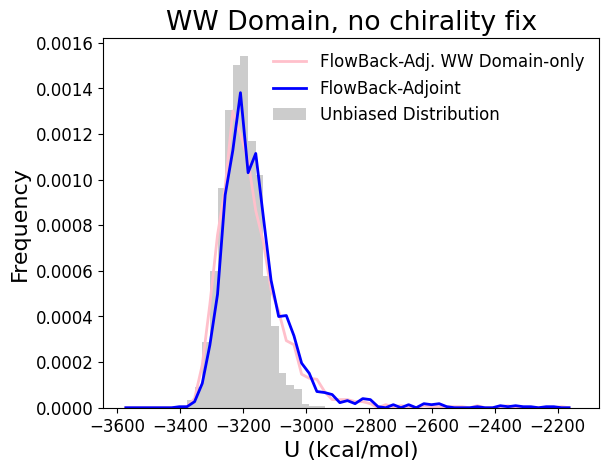

KS statistic: 0.13559322033898305
P-value: 0.6543903188208622
GTT | FlowBack-Adjoint   | Noise = 0.003      | KL = 0.0018
------------------------------------------------------------


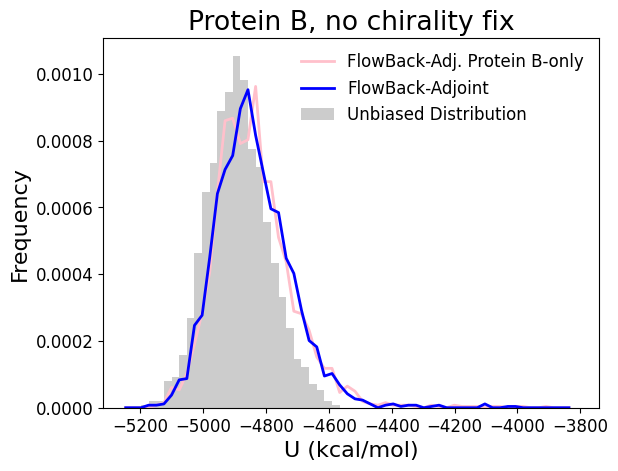

KS statistic: 0.1694915254237288
P-value: 0.36743563987529626
PRB | FlowBack-Adjoint   | Noise = 0.003      | KL = 0.0017
------------------------------------------------------------


In [12]:
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from rdkit import rdBase
# import warnings
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.stats import ks_2samp

matplotlib.rcParams['font.size'] = 16
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
from tqdm import tqdm

name_dict = {
    'GTT': 'WW Domain',
    'PRB': 'Protein B',
}

bins_ww        = np.linspace(-15000,  -9000, 60)
bins_prb       = np.linspace(-22000, -16000, 60) 


eps = 1e-12          # small number to avoid log(0)

for noise, ml in zip([0.003], ['lr5']):
    for protein, np_bins, ckp in zip(['GTT', 'PRB'], [bins_ww, bins_prb], [7090, 7104]):
    
        energies               = np.load(f"energy_files/energies_{protein}_nomodel.npy")
        flowback_euler_energies= np.load(f"energy_files/energies_{protein}_{protein.lower()}_flip_post_ckp-{ckp}_noise-{noise}_chi_0.25.npy")
    
        # build unbiased histogram first so we can reuse it
        hist_unbiased, bins = np.histogram(energies, np_bins, density=True)
    
        # --- FlowBack (Euler) ---
        hist_fb, _ = np.histogram(flowback_euler_energies, np_bins, density=True)
        plt.plot(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_fb,
                 c='pink', label=f'FlowBack-Adj. {name_dict[protein]}-only', lw=2)
    
        # # --- FlowBack + LJ/bonds ---
        # hist_fb_lj, _ = np.histogram(flowback_energies, np_bins, density=True)
        # plt.plot(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_fb_lj,
        #          c='green', label='FlowBack + LJ/bonds', lw=2)
    
        # optional FlowBack-Adjoint
        hist_adj = None
        flowback_adj_energies = np.load(f"energy_files/energies_{protein}_n2503_post_ckp-7000_noise-{noise}_chi_0.25.npy")
        hist_adj, _ = np.histogram(flowback_adj_energies, np_bins, density=True)
        # print(np.mean(flowback_adj_energies), np.percentile(flowback_adj_energies, 25),  np.median(flowback_adj_energies), np.percentile(flowback_adj_energies, 75))
        plt.plot(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_adj,
                 c='blue', label=f'FlowBack-Adjoint', lw=2)
        # unbiased bars
        bar_width = np.diff(bins)[0]
        plt.bar(0.5*(bins[:-1]+bins[1:]) / 4.184, hist_unbiased,
                color='black', width=bar_width / 4.184, align='edge',
                alpha=0.2, label='Unbiased Distribution')
    
        plt.xlabel('U (kcal/mol)')
        plt.ylabel('Frequency')
        plt.title(f'{name_dict.get(protein, protein)}, no chirality fix')
        plt.legend(fontsize=12, frameon=False)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
    
        # ---------- KL-divergence prints ----------
        # kl_fb      = np.sum(hist_unbiased * np.log((hist_unbiased+eps)/(hist_fb     +eps)))
        # kl_fb_lj   = np.sum(hist_unbiased * np.log((hist_unbiased+eps)/(hist_fb_lj +eps)))
        # print(f"{protein} | FlowBack             | Noise = {noise}     | KL = {kl_fb:.4f}")
        # print(f"{protein} | FlowBack + LJ/bonds    | Noise = {noise}    | KL = {kl_fb_lj:.4f}")
        if hist_adj is not None:
            kl_adj = np.sum(hist_unbiased * np.log((hist_unbiased+eps)/(hist_adj+eps)))
            statistic, p_value = ks_2samp(hist_fb, hist_adj)

            print(f"KS statistic: {statistic}")
            print(f"P-value: {p_value}")
            print(f"{protein} | FlowBack-Adjoint   | Noise = {noise}      | KL = {kl_adj:.4f}")
        print('-'*60)

    plt.show()

In [52]:
md.load('outputs/A0A0H3AFX3/big_model_ckp-15_noise-0.003_chi_0.25/trj_list.pk')

<mdtraj.Trajectory with 1 frames, 3339 atoms, 418 residues, without unitcells at 0x7ff9bfefba50>

In [18]:

import mdtraj as md
import nglview as nv
import cv2                       # pip install opencv-python-headless
import numpy as np
from io import BytesIO
from PIL import Image            # tiny helper to cover PIL.Image outputs
from tqdm import tqdm
import os 
os.environ['IMAGEIO_FFMPEG_EXE'] = '/scratch/midway3/berlaga/miniconda3/envs/djax/lib/python3.11/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux64-v4.1'

# ---------- 1.  Load trajectory  -------------------------------------
traj = md.load("outputs/one_GTT/n2503_post_ckp-7000_noise-0.003_chi_0.2/frame_0_dt.pdb")[::-1]   # or .dcd, .trr, …
view  = nv.show_mdtraj(traj, default=False)
view.clear_representations()
view.add_cartoon(color="grey")
view.add_ball_and_stick()
view.background = "white"
display(view)
# 2) ask MovieMaker to render every frame and write an MP4
from nglview.contrib.movie import MovieMaker

mov = MovieMaker(
        view,
        output="trajectory.mp4",          # .gif, .avi, .mov also work
        fps=24,
        in_memory=True,                   # keeps everything RAM-side; no temp files
        moviepy_params={"codec": "libx264"}  # H.264 (widely compatible)
)
mov.make()                                # ≈ one line of progress dots …

# print("✅  trajectory.mp4 saved")

NGLWidget(max_frame=99)

IntProgress(value=0, description='Rendering ...', max=99)

In [21]:
import imageio_ffmpeg, subprocess, os, sys

ffmpeg = imageio_ffmpeg.get_ffmpeg_exe()
print("MoviePy will use ➜", ffmpeg)

# If that printed 'None', fetch a bundled binary now
if ffmpeg is None:
    import imageio_ffmpeg as iff
    ffmpeg = iff.get_ffmpeg_exe()         # downloads into ~/.imageio/ffmpeg

# Confirm it actually runs
print(subprocess.check_output([ffmpeg, "-version"]).decode().split("\n")[0])

MoviePy will use ➜ /scratch/midway3/berlaga/miniconda3/envs/djax/lib/python3.11/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux-x86_64-v7.0.2
ffmpeg version 7.0.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2024 the FFmpeg developers


In [31]:
view  = nv.show_mdtraj(traj, default=False)
view.clear_representations()
view.add_cartoon(color="grey")
view.add_ball_and_stick(color_scheme="element")
view.background = "white"
display(view.player())

TypeError: 'TrajectoryPlayer' object is not callable

In [34]:
# -------------------------------------------------------------------
# Requirements (once per environment):
#   pip install mdtraj nglview imageio[pyav] pillow tqdm
# -------------------------------------------------------------------

import mdtraj as md, nglview as nv, imageio.v3 as iio, os, tempfile, shutil
from tqdm import tqdm
from pathlib import Path
from PIL import Image  # for safety when render_image -> PIL.Image

# 1 ──────────────────────────────────────────────────────────────────
traj = md.load("outputs/one_PRB/n2503_post_ckp-7000_noise-0.003_chi_0.2/frame_0_dt.pdb")[::-1]   # or .dcd, .trr, …

# 2 ──────────────────────────────────────────────────────────────────
view = nv.show_mdtraj(traj, default=False)
view.layout.width  = "800px"                       # widget canvas
view.layout.height = "600px"

view.clear_representations()
view.add_cartoon(color="grey")
view.add_ball_and_stick(selection="not backbone",
                        color_scheme="element")
view.background = "white"
view.camera = "perspective"

# 3 ──────────────────────────────────────────────────────────────────
fps    = 24              # output frame-rate
factor = 2               # supersample (2× resolution)
out_mp4 = "trajectory.mp4"

tmpdir = tempfile.mkdtemp(prefix="nvframes_")
try:
    png_paths = []

    for i in tqdm(range(traj.n_frames), desc="rendering"):
        view.frame = i
        img = view.render_image(factor=factor)

        fn = f"{tmpdir}/{i:05d}.png"
        if isinstance(img, bytes):                # older nglview
            with open(fn, "wb") as fh:
                fh.write(img)
        else:                                     # PIL.Image on newer
            img.save(fn, format="PNG")
        png_paths.append(fn)

    # 4 ─────────────────────  encode with imageio/ffmpeg  ───────────
    with iio.get_writer(out_mp4,
                        fps=fps,
                        codec="h264",
                        pixelformat="yuv420p") as writer:
        for fn in tqdm(png_paths, desc="encoding"):
            writer.append_data(iio.imread(fn))

finally:                                          # tidy up temp PNGs
    shutil.rmtree(tmpdir, ignore_errors=True)

print(f"✅  Saved {out_mp4}")

rendering:   0%|                                        | 0/100 [00:00<?, ?it/s]


AttributeError: 'Image' object has no attribute 'save'

In [3]:
import imageio_ffmpeg
print(imageio_ffmpeg.get_ffmpeg_exe())

/scratch/midway3/berlaga/miniconda3/envs/djax/lib/python3.11/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux64-v4.1


In [6]:
import pandas as pd
pd.read_csv('uniprot.tsv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2
